## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from ydata_profiling import ProfileReport

### Read Data

In [5]:
df =pd.read_csv("students_adaptability_level_online_education.csv")

In [6]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


### Generate Data Profiling Report

In [7]:
Report = ProfileReport(df)

In [8]:
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.shape

(1205, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [11]:
df.duplicated().sum()

949

In [12]:
#df.groupby(list(df.columns)).size()

In [13]:
df.tail()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1204,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Moderate


We will not delete the duplicates because we don't have any primary key/unique col in the dataset. Dropping 946 can cause us lose important data

### Check for missing values


In [14]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

# Encoding

Choose a suitable encoding technique for the columns.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


Location column has a weak correalation with other columns, and the data in it do not make sense. So we can drop it.

In [16]:
df = df.drop(['Location'], axis=1)

In [17]:
df.shape

(1205, 13)

In [18]:
df["Adaptivity Level"].value_counts()

Adaptivity Level
Moderate    625
Low         480
High        100
Name: count, dtype: int64

### ONE HOT ENCODING FOR NOMINAL DATA

In [19]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Gender', 'Institution Type', 'IT Student', 'Load-shedding','Internet Type', 'Network Type','Self Lms','Device'], dtype = int)#by default get dummy gives boolean result so we set datatype 
one_hot_encoded_data.head()

,Age,Education Level,Financial Condition,Class Duration,Adaptivity Level,Gender_Boy,Gender_Girl,Institution Type_Government,Institution Type_Non Government,IT Student_No,...,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,21-25,University,Mid,3-6,Moderate,1,0,0,1,1,...,0,1,0,0,1,1,0,0,0,1
1,21-25,University,Mid,1-3,Moderate,0,1,0,1,1,...,1,0,0,0,1,0,1,0,1,0
2,16-20,College,Mid,1-3,Moderate,0,1,1,0,1,...,0,1,0,0,1,1,0,0,1,0
3,11-15,School,Mid,1-3,Moderate,0,1,0,1,1,...,1,0,0,0,1,1,0,0,1,0
4,16-20,School,Poor,0,Low,0,1,0,1,1,...,1,0,0,1,0,1,0,0,1,0


In [20]:
one_hot_encoded_data.shape

(1205, 23)

In [21]:
df = one_hot_encoded_data

In [22]:
df.head()

,Age,Education Level,Financial Condition,Class Duration,Adaptivity Level,Gender_Boy,Gender_Girl,Institution Type_Government,Institution Type_Non Government,IT Student_No,...,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,21-25,University,Mid,3-6,Moderate,1,0,0,1,1,...,0,1,0,0,1,1,0,0,0,1
1,21-25,University,Mid,1-3,Moderate,0,1,0,1,1,...,1,0,0,0,1,0,1,0,1,0
2,16-20,College,Mid,1-3,Moderate,0,1,1,0,1,...,0,1,0,0,1,1,0,0,1,0
3,11-15,School,Mid,1-3,Moderate,0,1,0,1,1,...,1,0,0,0,1,1,0,0,1,0
4,16-20,School,Poor,0,Low,0,1,0,1,1,...,1,0,0,1,0,1,0,0,1,0


### Label Encoding for Ordinal Data

In [23]:
df["Adaptivity Level"].value_counts().sort_index()

Adaptivity Level
High        100
Low         480
Moderate    625
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

col = ['Age','Education Level','Financial Condition','Class Duration','Adaptivity Level']

df[col] = df[col].apply(LabelEncoder().fit_transform)

In [25]:
df.head()

,Age,Education Level,Financial Condition,Class Duration,Adaptivity Level,Gender_Boy,Gender_Girl,Institution Type_Government,Institution Type_Non Government,IT Student_No,...,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,3,2,0,2,2,1,0,0,1,1,...,0,1,0,0,1,1,0,0,0,1
1,3,2,0,1,2,0,1,0,1,1,...,1,0,0,0,1,0,1,0,1,0
2,2,0,0,1,2,0,1,1,0,1,...,0,1,0,0,1,1,0,0,1,0
3,1,1,0,1,2,0,1,0,1,1,...,1,0,0,0,1,1,0,0,1,0
4,2,1,1,0,1,0,1,0,1,1,...,1,0,0,1,0,1,0,0,1,0


### Check distribution

In [26]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

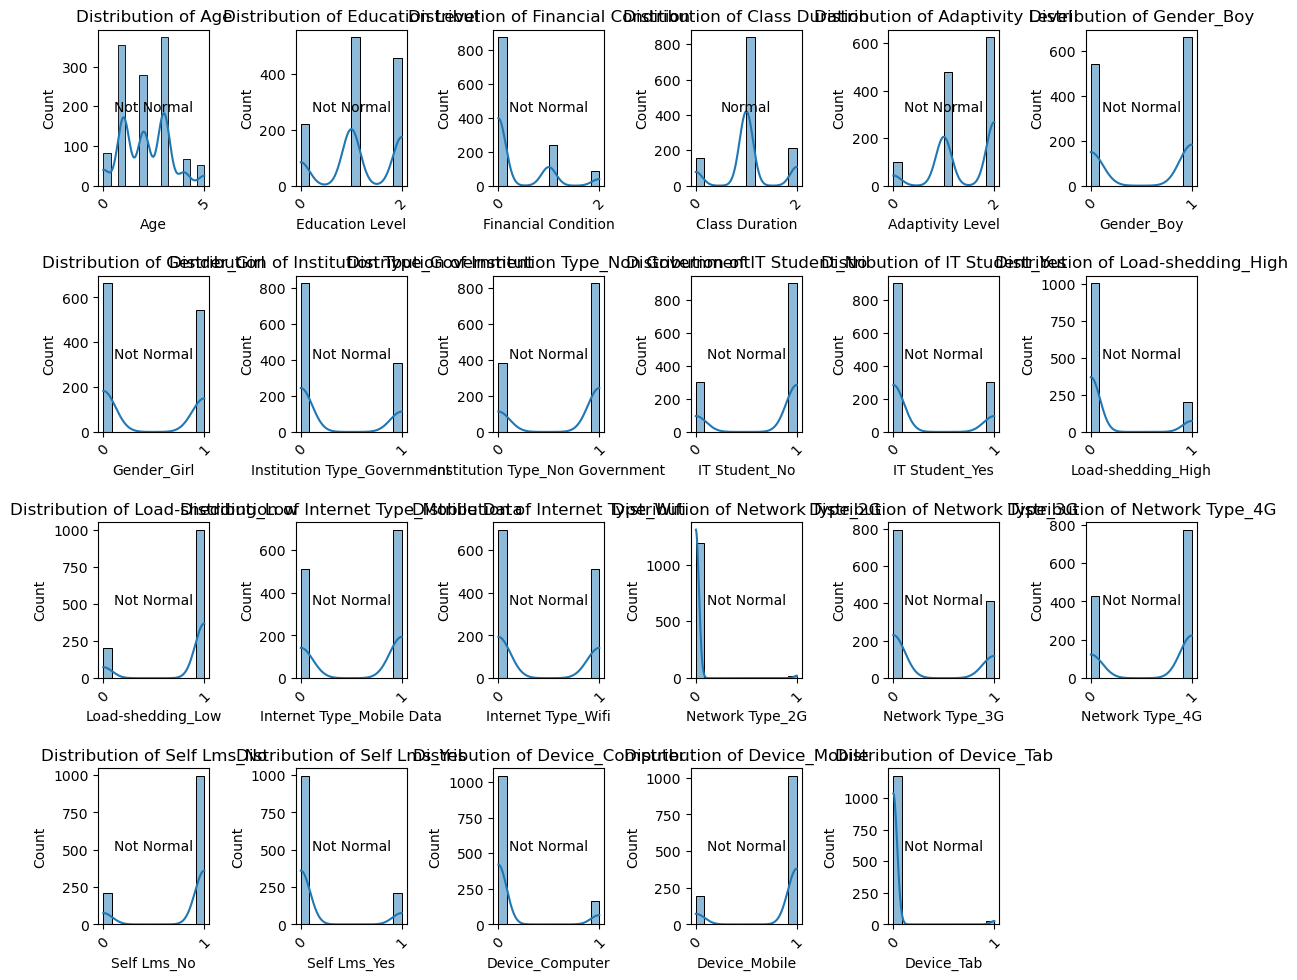

In [27]:
plt.figure(figsize=(12, 10))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(df.columns):
    plt.subplot(4, 6, i+1)
    sns.histplot(df[column], kde=True)    
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Add additional analysis to detect distribution type
    # Check for normal distribution
    k2, p = stats.normaltest(df[column])
    # null hyposthesis => The sample is from Normal dsitribution
    if (p < 0.05) | (np.isnan(p)):
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [28]:
df.head(2)

,Age,Education Level,Financial Condition,Class Duration,Adaptivity Level,Gender_Boy,Gender_Girl,Institution Type_Government,Institution Type_Non Government,IT Student_No,...,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,3,2,0,2,2,1,0,0,1,1,...,0,1,0,0,1,1,0,0,0,1
1,3,2,0,1,2,0,1,0,1,1,...,1,0,0,0,1,0,1,0,1,0


In [29]:
X = df.drop('Adaptivity Level', axis=1)
y = df['Adaptivity Level']

### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalizing features
min_max_scaler = MinMaxScaler()

min_max_scaler.fit(X)


MinMaxScaler()

In [31]:
scaled_features = min_max_scaler.transform(X)

In [32]:
scaled_features

array([[0.6, 1. , 0. , ..., 0. , 0. , 1. ],
       [0.6, 1. , 0. , ..., 0. , 1. , 0. ],
       [0.4, 0. , 0. , ..., 0. , 1. , 0. ],
       ...,
       [0.2, 0.5, 0. , ..., 0. , 1. , 0. ],
       [0.4, 0. , 0. , ..., 0. , 1. , 0. ],
       [0.2, 0.5, 0.5, ..., 0. , 1. , 0. ]])

In [33]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Age,Education Level,Financial Condition,Class Duration,Adaptivity Level,Gender_Boy,Gender_Girl,Institution Type_Government,Institution Type_Non Government,IT Student_No,...,Load-shedding_Low,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile
0,0.6,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.6,1.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.4,0.0,0.0,0.5,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.2,0.5,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.4,0.5,0.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,  y,  test_size=0.30)

# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
pred = knn.predict(X_test)

## Predictions and Evaluations
Let's evaluate our KNN model!

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(confusion_matrix(y_test,pred))

[[ 17   2  10]
 [  1 133  16]
 [  3  15 165]]


In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68        29
           1       0.89      0.89      0.89       150
           2       0.86      0.90      0.88       183

    accuracy                           0.87       362
   macro avg       0.85      0.79      0.82       362
weighted avg       0.87      0.87      0.87       362



In [43]:
#Training Accuracy
print(knn.score(X_train, y_train))

0.9051008303677343


In [44]:
#Testing Accuracy
print(knn.score(X_test, y_test))

0.8701657458563536


#### Check different distance metric

**Euclidean**

In [45]:
#KNeighborsClassifier with Manhattan distance metric

knn_classifier_manhattan = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

knn_classifier_manhattan.fit(X_train, y_train)

# Predictions
predictions_manhattan = knn_classifier_manhattan.predict(X_test)

#Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_manhattan))

#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, predictions_manhattan))

#accuracy score
#accuracy_manhattan = accuracy_score(y_test, predictions_manhattan)
#print("\nAccuracy Score (Manhattan Distance):", accuracy_manhattan)

Confusion Matrix:
[[ 17   2  10]
 [  1 133  16]
 [  3  15 165]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68        29
           1       0.89      0.89      0.89       150
           2       0.86      0.90      0.88       183

    accuracy                           0.87       362
   macro avg       0.85      0.79      0.82       362
weighted avg       0.87      0.87      0.87       362



**Manhattan**

In [46]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

knn_classifier.fit(X_train, y_train)

# Predictions
predictions = knn_classifier.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

#classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

#accuracy score
#accuracy = accuracy_score(y_test, predictions)
#print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[ 17   2  10]
 [  1 133  16]
 [  3  15 165]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68        29
           1       0.89      0.89      0.89       150
           2       0.86      0.90      0.88       183

    accuracy                           0.87       362
   macro avg       0.85      0.79      0.82       362
weighted avg       0.87      0.87      0.87       362



In [47]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.57      0.45      0.50        29
           1       0.86      0.83      0.84       150
           2       0.82      0.86      0.84       183

    accuracy                           0.82       362
   macro avg       0.75      0.71      0.73       362
weighted avg       0.81      0.82      0.81       362



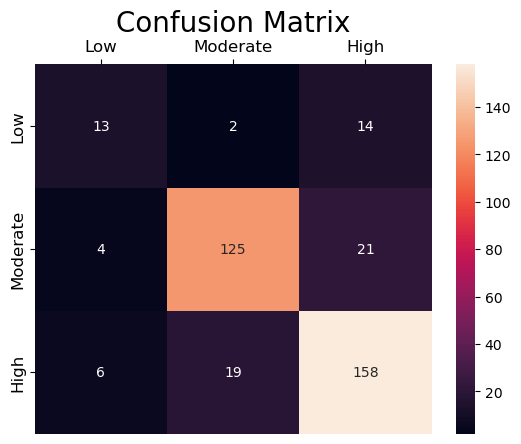

In [48]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt = 'g'); 
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize = 12)
plt.show()

# Decision Tree

**Using Entropy**

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [50]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [51]:
# Making predictions and evaluating the models
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_entropy

0.8895027624309392

In [52]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print(classification_report(y_test,y_pred_entropy))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72        29
           1       0.90      0.91      0.90       150
           2       0.89      0.91      0.90       183

    accuracy                           0.89       362
   macro avg       0.88      0.82      0.84       362
weighted avg       0.89      0.89      0.89       362



### Use Gini Index

In [53]:
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)

accuracy_gini

0.8950276243093923

In [55]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72        29
           1       0.90      0.93      0.91       150
           2       0.90      0.91      0.91       183

    accuracy                           0.90       362
   macro avg       0.88      0.82      0.85       362
weighted avg       0.89      0.90      0.89       362



Accuracy of Decision Tree Is better than KNN for predicting Students Adaptability level in Online Education.

# All the Best!